# Results analysis

This Notebook has the intention to compares the metrics of a DRL Policy and a RB Policy applied both to a Building Control in EnergyPlus model.

## Importing the evaluation result files

First you need to import the files produced by `init_conventional.py` `init_evaluation.py`. The first is the RB Policy applied to the evaluation case, while the second one is the DRL Policy applied to the same scenario.

In [21]:
# Import the necesaty libraries
import pandas as pd

# Replace 'ppo_file_path' and 'rb_file_path' with the actual paths to your CSV files
ppo_file_path = "C:/Users/grhen/Documents/ray_results/proposed_test/PPO_test_4.csv"
rb_file_path = "C:/Users/grhen/Documents/ray_results/conventional_test/conventional_test_1.csv"

# Read CSV files into pandas DataFrames
ppo_data = pd.read_csv(ppo_file_path, header=None)
rb_data = pd.read_csv(rb_file_path, header=None)

# Function to clean and format the data
def clean_and_format(data: pd.DataFrame):
    # Remove empty rows
    data = data.dropna(how='all')

    # Add the specified header
    header = ["To", "Ti", "v", "d", "RHo", "RHi", "dh", "dc", "opening_window_1", "opening_window_2",
              "To_p1h", "To_p2h", "To_p3h", "T_max_0", "T_min_0", "RH_0", "raining_total_0", "wind_avg_0",
              "wind_max_0", "total_sky_cover_0", "T_max_1", "T_min_1", "RH_1", "raining_total_1", "wind_avg_1",
              "wind_max_1", "total_sky_cover_1", "T_max_2", "T_min_2", "RH_2", "raining_total_2", "wind_avg_2",
              "wind_max_2", "total_sky_cover_2", 'hora', 'simulation_day', 'volumen', 'window_area_relation_north',
              'window_area_relation_west', 'window_area_relation_south', 'window_area_relation_east',
              'construction_config', 'internal_mass', 'latitud', 'longitud', 'altitud', 'beta', 'E_max',
              "rad", "reward", "terminated", "truncated", 'done', 'energy', 'comfort', 'ppd']

    data.columns = header

    return data

# Apply cleaning and formatting to both DataFrames
ppo_data_cleaned = clean_and_format(ppo_data)
rb_data_cleaned = clean_and_format(rb_data)

# Now 'ppo_data_cleaned' and 'rb_data_cleaned' contain the cleaned and formatted data


You can analyse the general results obtained in both files with the `describe` method of pandas for DataFrame types.

In [23]:
# General results of the RB Policy
rb_data_cleaned.describe()

,To,Ti,v,d,RHo,RHi,dh,dc,opening_window_1,opening_window_2,...,latitud,longitud,altitud,beta,E_max,rad,reward,energy,comfort,ppd
count,4463.000000,4463.000000,4463.000000,4463.000000,4463.000000,4463.000000,4463.0,4463.000000,4463.0,4463.000000,...,4.463000e+03,4463.00,4463.0,4463.0,4.463000e+03,4463.000000,4463.000000,4463.000000,4463.000000,4463.000000
mean,23.611685,23.561918,1.589644,215.815296,41.870752,86.457851,0.0,158.484533,0.0,0.122339,...,-3.298500e+01,-68.93,1043.0,0.5,4.166667e-01,295.817611,-0.000053,0.000044,-2.243255,47.105513
std,5.247408,1.167612,1.096777,84.701585,16.568766,20.449496,0.0,270.438058,0.0,0.327714,...,1.421245e-14,0.00,0.0,0.0,1.110347e-16,362.552628,0.000050,0.000075,2.439967,44.945354
min,10.900000,19.910980,0.000000,0.000000,14.000000,30.351205,0.0,0.000000,0.0,0.000000,...,-3.298500e+01,-68.93,1043.0,0.5,4.166667e-01,0.000000,-0.000112,0.000000,-7.206859,5.000000
25%,19.800000,22.735436,0.733333,196.000000,28.000000,77.904320,0.0,0.000000,0.0,0.000000,...,-3.298500e+01,-68.93,1043.0,0.5,4.166667e-01,0.000000,-0.000112,0.000000,-4.943869,6.241663
50%,23.283333,23.445198,1.400000,224.333333,40.000000,99.396563,0.0,0.000000,0.0,0.000000,...,-3.298500e+01,-68.93,1043.0,0.5,4.166667e-01,70.333333,-0.000017,0.000000,-0.702333,15.374601
75%,27.716667,24.445696,2.166667,263.000000,52.000000,100.000000,0.0,250.000000,0.0,0.000000,...,-3.298500e+01,-68.93,1043.0,0.5,4.166667e-01,629.416667,-0.000007,0.000069,-0.127350,100.000000
max,36.700000,26.463091,7.100000,359.666667,82.000000,100.000000,0.0,873.989111,0.0,1.000000,...,-3.298500e+01,-68.93,1043.0,0.5,4.166667e-01,1077.000000,-0.000006,0.000243,0.570067,100.000000


In [22]:
# General results of the DRL Policy
ppo_data_cleaned.describe()

,To,Ti,v,d,RHo,RHi,dh,dc,opening_window_1,opening_window_2,...,latitud,longitud,altitud,beta,E_max,rad,reward,energy,comfort,ppd
count,4463.000000,4463.000000,4463.000000,4463.000000,4463.000000,4463.000000,4463.0,4463.000000,4463.0,4463.0,...,4.463000e+03,4463.00,4463.0,4463.0,4.463000e+03,4463.000000,4463.000000,4463.000000,4463.000000,4463.000000
mean,23.611685,23.807108,1.589644,215.815296,41.870752,97.595500,0.0,304.950431,0.0,0.0,...,-3.298500e+01,-68.93,1043.0,0.5,4.166667e-01,295.817611,-0.000053,0.000085,-2.029969,47.584440
std,5.247408,1.187273,1.096777,84.701585,16.568766,7.787673,0.0,388.159232,0.0,0.0,...,1.421245e-14,0.00,0.0,0.0,1.110347e-16,362.552628,0.000050,0.000108,2.355748,44.536310
min,10.900000,20.624245,0.000000,0.000000,14.000000,39.590251,0.0,0.000000,0.0,0.0,...,-3.298500e+01,-68.93,1043.0,0.5,4.166667e-01,0.000000,-0.000112,0.000000,-6.582330,5.000000
25%,19.800000,22.880432,0.733333,196.000000,28.000000,99.159279,0.0,0.000000,0.0,0.0,...,-3.298500e+01,-68.93,1043.0,0.5,4.166667e-01,0.000000,-0.000112,0.000000,-4.561306,6.666705
50%,23.283333,23.705289,1.400000,224.333333,40.000000,100.000000,0.0,0.000000,0.0,0.0,...,-3.298500e+01,-68.93,1043.0,0.5,4.166667e-01,70.333333,-0.000019,0.000000,-0.690943,17.096035
75%,27.716667,24.719925,2.166667,263.000000,52.000000,100.000000,0.0,819.090187,0.0,0.0,...,-3.298500e+01,-68.93,1043.0,0.5,4.166667e-01,629.416667,-0.000008,0.000228,0.011374,99.999999
max,36.700000,26.578999,7.100000,359.666667,82.000000,100.000000,0.0,915.162744,0.0,0.0,...,-3.298500e+01,-68.93,1043.0,0.5,4.166667e-01,1077.000000,-0.000006,0.000254,0.872436,100.000000


## Graphs

Some metrics are better whe we can see how they change in time. In this part graphs are created to a more detailed view of the results.

In [33]:
import matplotlib.pyplot as plt

def line_plot(
    ppo_data_cleaned: pd.DataFrame,
    rb_data_cleaned: pd.DataFrame,
    column_name:str
    ):
    """Plot a line chart

    Args:
        ppo_data_cleaned (pd.DataFrame): The metrics of the DRL Policy to be ploted.
        rb_data_cleaned (pd.DataFrame): The metrics of the RB Policy to be ploted.
        column_name (str): The ID name of the column in the DataFrames evaluated.
    """
    # Plotting PPO results
    plt.plot(ppo_data_cleaned[column_name], label='PPO')

    # Plotting RB results
    plt.plot(rb_data_cleaned[column_name], label='RB')

    # Adding labels and title
    plt.xlabel('Time Steps')
    plt.ylabel(column_name)
    plt.title(f'Comparison of {column_name} between PPO and RB policies')
    plt.legend()

    # Display the plot
    plt.show()


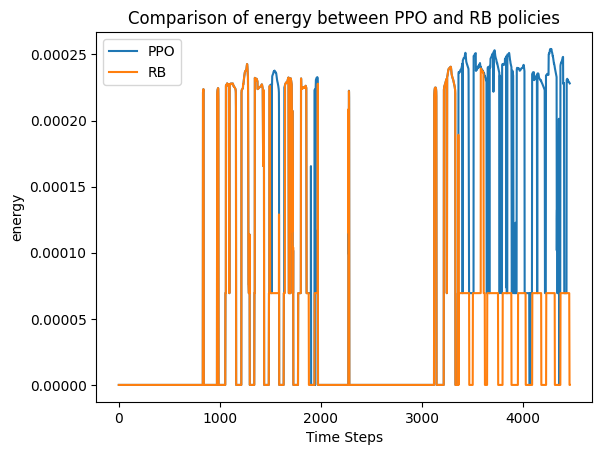

In [34]:
# Replace 'column_name' with the name of the column you want to plot
column_name = 'energy'

line_plot(
    ppo_data_cleaned=ppo_data_cleaned,
    rb_data_cleaned=rb_data_cleaned,
    column_name=column_name
    )

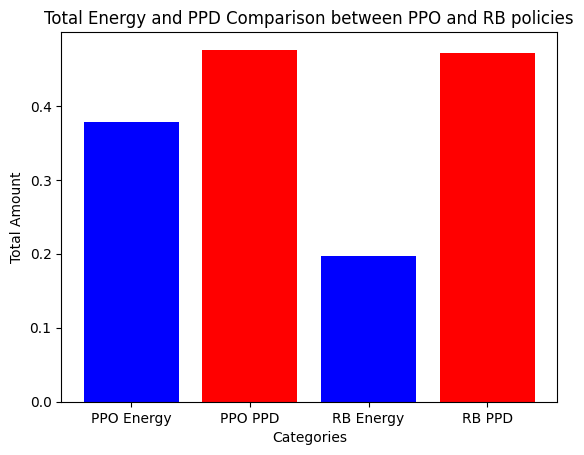

In [42]:
# Define the columns representing 'energy' and 'comfort'
energy_column = 'energy'
ppd_column = 'ppd'

# Calculate total energy and comfort for each DataFrame
ppo_total_energy = ppo_data_cleaned[energy_column].sum()
ppo_total_ppd = ppo_data_cleaned[ppd_column].mean()/100

rb_total_energy = rb_data_cleaned[energy_column].sum()
rb_total_ppd = rb_data_cleaned[ppd_column].mean()/100

# Create a bar graph
categories = ['PPO Energy', 'PPO PPD', 'RB Energy', 'RB PPD']
values = [ppo_total_energy, ppo_total_ppd, rb_total_energy, rb_total_ppd]

plt.bar(categories, values, color=['blue', 'red', 'blue', 'red'])
plt.xlabel('Categories')
plt.ylabel('Total Amount')
plt.title('Total Energy and PPD Comparison between PPO and RB policies')
plt.show()

In [44]:
ppo_energy_rate_increment = (ppo_total_energy-rb_total_energy)/rb_total_energy
ppo_comfort_rate_increment = (ppo_total_ppd-rb_total_ppd)/rb_total_ppd

print('The Energy Rate Increment of PPO Policy is: ' + str(round(ppo_energy_rate_increment*100, 2))+'%\n')
print('The PPD Rate Increment of PPO Policy is: ' + str(round(ppo_comfort_rate_increment*100, 2))+'%')

The Energy Rate Increment of PPO Policy is: 92.42%

The PPD Rate Increment of PPO Policy is: 1.02%
